---
# H515 - Statistical Learning - Course Project
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_original = pd.read_csv("../../data/Melbourne_housing_FULL.csv")

## Original Data

In [2]:
df_original.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [4]:
df_original.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


## Preprocessing

### NA Values

In [5]:
df_original.shape

(34857, 21)

In [6]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [7]:
df_original.drop(columns=["BuildingArea", "YearBuilt", "Propertycount", "Regionname", "Car"], axis=1, inplace=True)
df = df_original.dropna()

df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,CouncilArea,Lattitude,Longtitude
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,202.0,Yarra City Council,-37.7996,144.9984
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,156.0,Yarra City Council,-37.8079,144.9934
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,134.0,Yarra City Council,-37.8093,144.9944
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,94.0,Yarra City Council,-37.7969,144.9969
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,120.0,Yarra City Council,-37.8072,144.9941


In [8]:
df.shape

(17951, 16)

### Column Types

In [9]:
columns = ["Bedroom2", "Bathroom"]

for column in columns:
    df[column] = df[column].astype(int)

/tmp/ipykernel_129088/2287500834.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(int)
/tmp/ipykernel_129088/2287500834.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(int)


### Duplicates

In [10]:
duplicated = df.duplicated(subset=("Lattitude", "Longtitude", "Date"), keep="first")

df[duplicated].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,CouncilArea,Lattitude,Longtitude
3533,Collingwood,2/79 Oxford St,2,u,855000.0,S,Nelson,3/09/2016,1.6,3066.0,2,1,2886.0,Yarra City Council,-37.8042,144.9845
3540,Collingwood,6/78 Oxford St,2,u,910000.0,S,Jellis,4/03/2017,1.6,3066.0,2,1,0.0,Yarra City Council,-37.8035,144.9850
5358,Hawthorn,318/6 Lisson Gr,1,u,485000.0,S,Marshall,28/08/2016,4.6,3122.0,2,1,0.0,Boroondara City Council,-37.8264,145.0270
7829,Port Melbourne,133/95 Rouse St,2,u,1070000.0,S,RT,10/09/2016,3.8,3207.0,2,2,0.0,Melbourne City Council,-37.8435,144.9415
8045,Prahran,49 Clifton St,2,h,765000.0,S,Beller,19/11/2016,4.5,3181.0,2,1,98.0,Stonnington City Council,-37.8501,144.9953


In [11]:
df = df[~duplicated]

### Removing Outliers

#### YearBuilt

In [12]:
def plot_histogram(dataframe, column, figsize=None):

    if figsize is not None:
        plt.figure(figsize=figsize)
    sns.histplot(dataframe[column])
    plt.title(f"Histogram of {column} Column")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [13]:
# plot_histogram(df, "YearBuilt", (10, 8))

In [14]:
# built_before_1800 = df["YearBuilt"] < 1800
# df[built_before_1800]

In [15]:
# df = df[~built_before_1800]

#### BuildingArea

In [16]:
# build_eq_zero = (df["BuildingArea"] == 0)
# print(f"Properties with Zero Building Area - {sum(build_eq_zero)}")

# df = df[~build_eq_zero]

#### Landsize

In [18]:
land_eq_zero = (df["Landsize"] == 0)
print(f"Properties with Zero Land Size - {sum(land_eq_zero)}")

df = df[~land_eq_zero]

Properties with Zero Land Size - 0


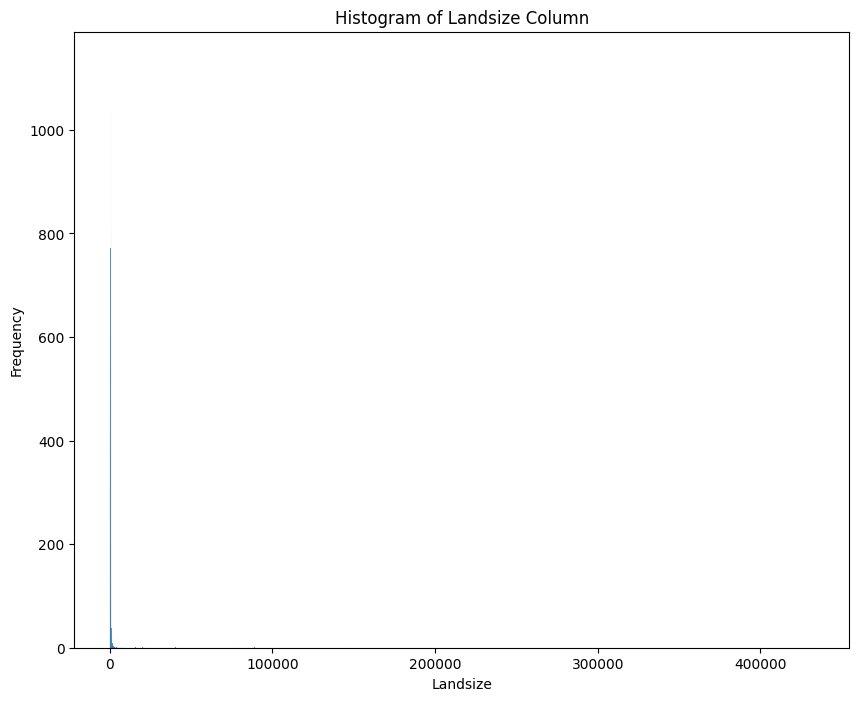

In [19]:
plot_histogram(df, "Landsize", (10, 8))

In [20]:
percentile_value = df["Landsize"].quantile(.95)
print(percentile_value)

gt_95_prec_land = (df["Landsize"] > percentile_value)
df[gt_95_prec_land].head()

1011.0


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,CouncilArea,Lattitude,Longtitude
41,Abbotsford,138/56 Nicholson St,3,u,1090000.0,S,Jellis,18/03/2017,2.5,3067.0,3,2,4290.0,Yarra City Council,-37.8078,144.9965
86,Airport West,3 Deidre Ct,3,h,895000.0,PI,Rendina,10/09/2016,13.5,3042.0,3,1,1063.0,Moonee Valley City Council,-37.7249,144.8728
235,Altona,29 Rose St,4,h,1780000.0,SP,Greg,4/06/2016,13.8,3018.0,4,3,1057.0,Hobsons Bay City Council,-37.8681,144.8190
388,Armadale,526 Orrong Rd,4,h,3000000.0,VB,Jellis,4/06/2016,6.3,3143.0,4,2,1581.0,Stonnington City Council,-37.8580,145.0111
392,Armadale,9/19 Mercer Rd,3,u,735000.0,PI,Marshall,7/05/2016,6.3,3143.0,3,2,2113.0,Stonnington City Council,-37.8543,145.0262


In [21]:
percentile_value = df["Landsize"].quantile(.995)
print(percentile_value)

gt_995_prec_land = (df["Landsize"] > percentile_value)
df[gt_995_prec_land].head()

5021.940000000002


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,CouncilArea,Lattitude,Longtitude
1198,Balwyn North,9 Gildan St,3,h,2000000.0,VB,Kay,28/08/2016,9.2,3104.0,3,1,75100.0,Boroondara City Council,-37.8002,145.0700
3539,Collingwood,4/170 Oxford St,3,u,950000.0,S,Jellis,4/03/2017,1.6,3066.0,3,2,15900.0,Yarra City Council,-37.8035,144.9850
4149,Essendon North,1 Dudley St,3,h,1425000.0,S,McGrath,25/02/2017,9.4,3041.0,3,2,10100.0,Moonee Valley City Council,-37.7376,144.8954
4415,Footscray,13/2 Saltriver Pl,3,u,674000.0,S,Jellis,11/02/2017,6.4,3011.0,3,2,8680.0,Maribyrnong City Council,-37.8016,144.9082
6195,Maidstone,17/46 Eucalyptus Dr,2,u,352500.0,S,hockingstuart,18/03/2017,9.2,3012.0,2,1,15100.0,Maribyrnong City Council,-37.7795,144.8729


In [22]:
df[df["Landsize"] > 30000]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,CouncilArea,Lattitude,Longtitude
1198,Balwyn North,9 Gildan St,3,h,2000000.0,VB,Kay,28/08/2016,9.2,3104.0,3,1,75100.0,Boroondara City Council,-37.80020,145.07000
6591,Maribyrnong,44/2 Horizon Dr,2,u,495000.0,S,Brad,18/03/2017,8.7,3032.0,2,2,37000.0,Maribyrnong City Council,-37.77520,144.89250
8599,Reservoir,14 Beenak St,3,h,572000.0,S,Ray,23/04/2016,11.2,3073.0,3,1,41400.0,Darebin City Council,-37.71040,145.02570
15109,Maribyrnong,2/6 Horizon Dr,2,u,585000.0,S,Brad,3/06/2017,4.3,3032.0,2,2,37000.0,Maribyrnong City Council,-37.77518,144.89254
16539,Silvan,1 Parker Rd,4,h,1070000.0,S,Ray,24/06/2017,34.6,3795.0,4,2,38490.0,Yarra Ranges Shire Council,-37.83229,145.43003
17293,Silvan,16 Eleanor Dr,3,h,1085000.0,S,Harcourts,27/05/2017,34.6,3795.0,3,2,76000.0,Yarra Ranges Shire Council,-37.84739,145.47052
18036,Fitzroy,389 Gore St,3,h,2700000.0,VB,Kay,12/08/2017,2.1,3065.0,3,3,433014.0,Yarra City Council,-37.79751,144.98309
18531,Gisborne,21 Braeside Rd,4,h,807000.0,S,Raine,15/07/2017,45.9,3437.0,4,2,40468.0,Macedon Ranges Shire Council,-37.50929,144.56444
22632,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,23/09/2017,48.1,3438.0,5,3,44500.0,Macedon Ranges Shire Council,-37.45392,144.58864
24800,Wildwood,430 Wildwood Rd,5,h,1030000.0,S,RE,14/10/2017,31.7,3429.0,5,2,89030.0,Hume City Council,-37.60400,144.80604


In [23]:
land_size_up_threshold = 10000
gt_10000_land = (df["Landsize"] > land_size_up_threshold)

df = df[~gt_10000_land]

In [24]:
(df["Landsize"] < 55).sum()

40

In [25]:
land_size_lo_threshold = 55
lt_55_land = (df["Landsize"] < land_size_lo_threshold)

df = df[~lt_55_land]

### Column Selection

In [26]:
print("Columns Unique Value Counts - \n")
for column in df.columns:
    print(f"{column} -", df.loc[:, column].nunique())

Columns Unique Value Counts - 

Suburb - 327
Address - 15640
Rooms - 10
Type - 3
Price - 2352
Method - 5
SellerG - 293
Date - 78
Distance - 206
Postcode - 200
Bedroom2 - 13
Bathroom - 10
Landsize - 1497
CouncilArea - 33
Lattitude - 9248
Longtitude - 9984


Columns **not** being used - `Suburb`, `Address`, `Method`, `SellerG`, `Postcode`, `CouncilArea` and `Regionname`

### Feature Engineering

#### BuildtoLandArea

In [27]:
# df["BuildtoLandArea"] = df["Landsize"] / df["BuildingArea"]

#### Property Count

In [28]:
# percentiles = [0, 20, 40, 60, 80, 100]
# bin_edges = np.percentile(df['Propertycount'], percentiles)

# bin_labels = ["Highly Sparse", "Below Avg.", "Average", "Above Avg.", "Highly Dense"]
# df["Propertycount_Bins"] = pd.cut(df["Propertycount"], bins=bin_edges, labels=bin_labels, include_lowest=True)

#### Bedroom

In [29]:
bed_20 = (df["Bedroom2"] == 20)

df = df[~bed_20]

#### Bathroom

In [30]:
bath_zero = (df["Bathroom"] == 0)

df = df[~bath_zero]

#### BedtoBath

In [31]:
df["BedtoBath"] = df["Bedroom2"] / df["Bathroom"]

In [32]:
num_columns = ["Distance", "Landsize", "Lattitude", "Longtitude", "BedtoBath"]
cat_columns = ["Rooms", "Type", "Bedroom2", "Bathroom"]

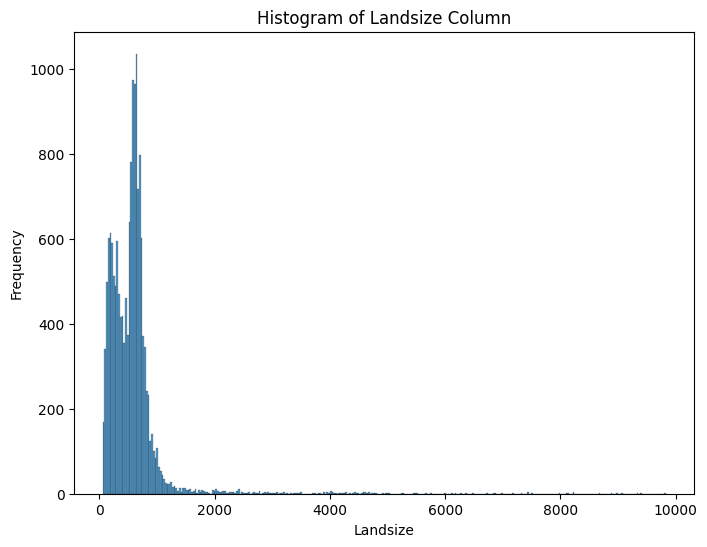

In [33]:
plot_histogram(df, "Landsize", (8, 6))

In [34]:
# plot_histogram(df, "BuildtoLandArea", (8, 6))

In [35]:
# plot_histogram(df, "BuildingArea", (8, 6))

In [36]:
# tail_heavy_columns = ["Landsize", "BuildingArea", "BuildtoLandArea"]
tail_heavy_columns = ["Landsize", ]
df[tail_heavy_columns] = df[tail_heavy_columns].apply(lambda x: np.log(x+1))

# plot_histogram(df, "Landsize", (10, 8))

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", StandardScaler(), num_columns),
        ("categorical", OneHotEncoder(handle_unknown='ignore'), cat_columns)
    ]
)

In [38]:
version = "v5"

df_preprocessed = preprocessor.fit_transform(df)

df_preprocessed = df_preprocessed.toarray()
print(df_preprocessed.shape)

np.save(f"../../processed-data/{version}/X.npy", df_preprocessed)

(15911, 39)


In [39]:
np.save(f"../../processed-data/{version}/y.npy", df["Price"])

In [39]:
# pd.DataFrame(df_preprocessed)
# pd.DataFrame(df_preprocessed).to_csv("preprocessed_data.csv", index=False)

In [40]:
import joblib

joblib.dump(preprocessor, f"../../joblib-files/preprocessing/{version}/preprocessor.pkl")

['../../joblib-files/preprocessing/v5/preprocessor.pkl']